<a href="https://colab.research.google.com/github/Sharon-Faith/spam_titanic_proj/blob/main/titanic_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

### a) Specifying the Question

The purpose of the study to create a model that will be able to determine whether or not a passenger survived the titanic, based on a number of factors (in [this dataset](https://archive.org/download/train5_202002/train%20%285%29.csv)).

### b) Defining the Metric for Success

* Determining and visualising the descriptive statistics of the variables.
* Determining and visualising the relationships between the column survived and the predictor variables.
* Creating a model that will be able to determine whether or not a passenger survived the titanic.


### c) Understanding the context 

The titanic was a ship that sunk in 1912 after striking an iceberg. It was the largest passenger ship afloat at the time. The disaster drew international attention and is still one of the most well known marine accidents. More than half of the passengers did not survive. There were a number of factors that influenced survival, such as age, cabin etc, and those factors will be explored in this project.

### d) Recording the Experimental Design

*   Determine the main objectives
*   Load and preview the dataset.
*   Understand the data.
*   Prepare the dataset - Identify outliers, anomalies, duplicates, missing values, and determine how deal with them, drop unnecessary columns etc.
*    Analyse the dataset using univariate, bivariate and multivariate analysis techniques.
*   Implement the solution through modelling.
*   Challenge the solution.
*   Conclusion and recommendations

### e) Data Relevance

The dataset provided ([here](https://archive.org/download/train5_202002/train%20%285%29.csv)) is relevant to the research question. It has the survival status of passengers as well as other information such as sex, age etc that may have affected the survival status.

## Reading the Data

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Loading the Dataset
# 
df = pd.read_csv('train (5).csv')

## Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
df.shape

(891, 12)

In [ ]:
# Previewing the top of our dataset
#
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing the bottom of our dataset
# 
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Checking datatype of each column
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Tidying the Dataset

In [ ]:
# dropping unnecessary columns
#dropping passenger id and name because those are unique for each record. the ticket column
#also isnt necessary
df.drop(columns = ['PassengerId', 'Name', 'Ticket'], inplace=True)

In [ ]:
# Checking for missing values
#
df.isnull().sum()
#Age had 177 missing values, cabin 687, and embarked 2 missing values

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df.shape

(891, 9)

In [ ]:
#cabin has more than 3/4 of the values missing so the column will be dropped
df.drop(columns='Cabin', inplace=True)

In [ ]:
#age has missing values
#age and class may be related. 

print(df.groupby(['Pclass'])['Age'].mean())
#the older, more likely to be in a higher class

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [ ]:

#will fill in missing values for age according to the avegare age in the class
#the passsenger is in

def age_est(cols):
    age = cols[1]
    pclass = cols[0]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

df['Age'] = df[['Pclass', 'Age']].apply(lambda cols: age_est(cols), axis=1)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
#dropping records with embarked as null
df.dropna(how='any', inplace=True)

In [ ]:
df.isnull().sum()
#no more missing values

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
# Survived 
# Pclass - passenger's class on the boat 
# Sex - passenger's gender 
# Age - person's age 
# SibSp - the number of relatives on the boat (that are siblings or a spouse) 
# Parch - the number of relatives on the boat (that are children or parents)
# Fare - fare a person paid 
# Embarked -a person's point of embarking
cat = ['Survived', 'Sex', 'Embarked']
num = []

for col in df.columns:
  if col not in cat:
    num.append(col)
num

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

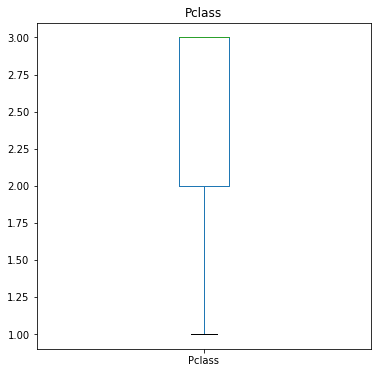

****************************************************


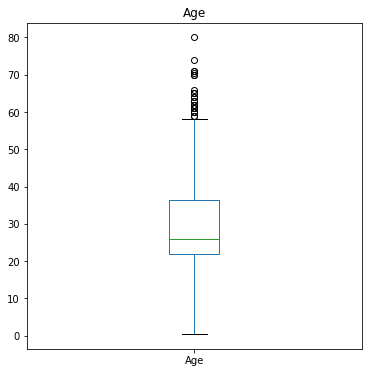

****************************************************


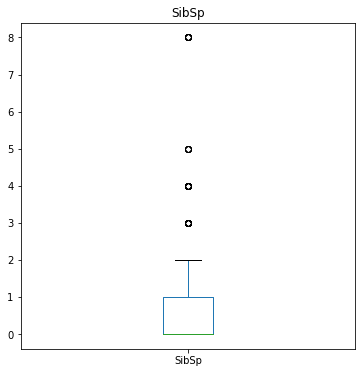

****************************************************


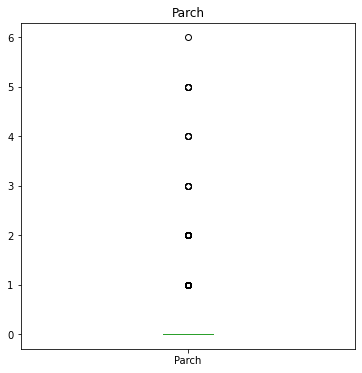

****************************************************


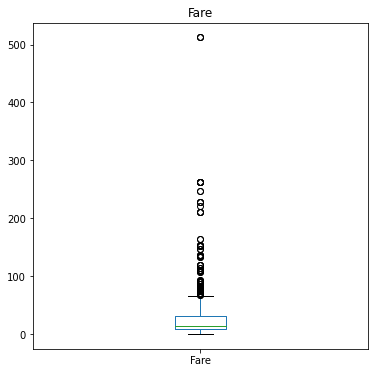

****************************************************


In [ ]:
# Checking for outliers and anomalies
#for originally numerical data,


for col in num:
  df.boxplot(col, grid=False)
  plt.title(col)
  plt.gcf().set_size_inches(6,6)
  plt.show()
  print('****************************************************')

* No outliers in pclass
* Some outliers in age - expected that some passengers were older than average so won’t be dropped
* Number of relatives that are siblings/spouse - some outliers. Expected that some families had many members travelling together so won’t drop them.
* Number of relatives that are parents/children - some outliers. Expected that some passengers had more than usual family members travelling together so won’t drop them.
* Fare - outliers. Expected that some passengers paid higher fees than most so won’t drop outliers.

In [ ]:
#checking for anomalies in columns representing categorical information
for col in cat:
  print(f'{col}:')
  print(df[col].unique())
  print('******************************************************************')
#no anomalies identified

Survived:
[0 1]
******************************************************************
Sex:
['male' 'female']
******************************************************************
Embarked:
['S' 'C' 'Q']
******************************************************************


In [ ]:
#Checking for duplicates
df.duplicated().sum()
#wont drop duplicates. the column dropped earlier for passeneger id had
#unique values for each record. it is possible for passengers to have similar
#data in the columns we have now

116

## Univariate Analysis

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

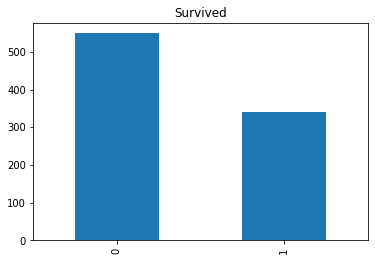

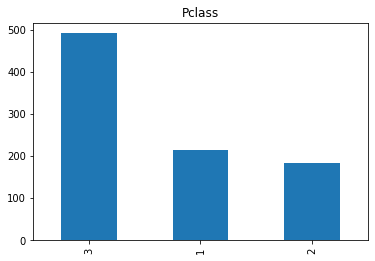

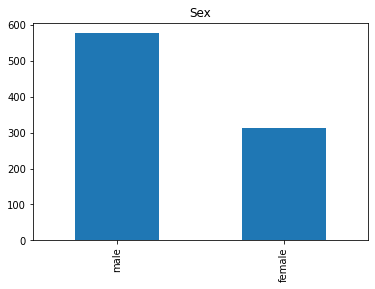

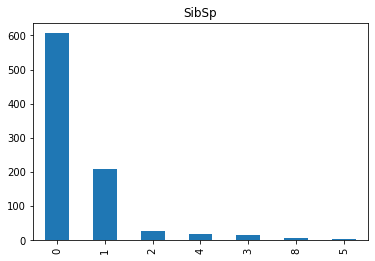

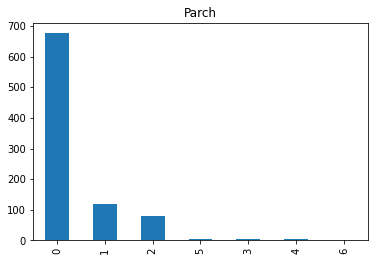

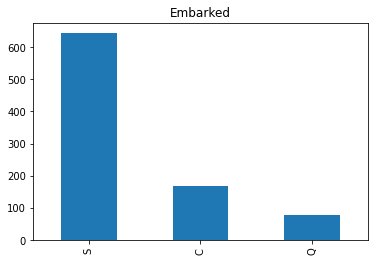

In [ ]:
# Countplots for columns except age and fare
for col in df.drop(columns=['Age', 'Fare']).columns:
    df[col].value_counts().plot.bar(title=col)
    plt.show()
    print('')
 


* A higher number of passengers didn’t survive compared to the number of those who did.
* Most passengers were in third class.
* Most passengers were male.
* Most passengers had no siblings or spouses aboard.
* Most passengers had no parents or children aboard.
* Most passengers embarked at point ‘S’

In [ ]:
# descriptive statistics continuous data
cols = ['Age', 'Fare']
for col in cols:
  print(f'\n{col}:')
  print('')
  print(df[col].describe())
  print('**************************************')


Age:

count    889.000000
mean      29.206040
std       13.177747
min        0.420000
25%       22.000000
50%       26.000000
75%       36.500000
max       80.000000
Name: Age, dtype: float64
**************************************

Fare:

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
**************************************


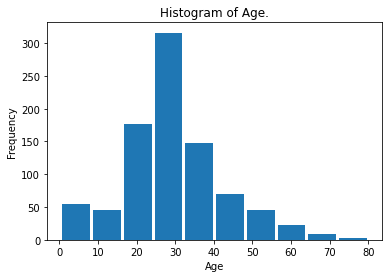

Most passengers were aged between 24 and 32



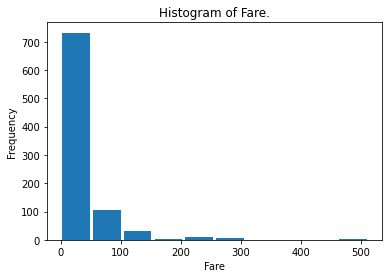

Most Fare values fell within the range of 0.0 to 51.23



In [ ]:
#plotting histograms for continuous

for col in cols:
  (n, bins, patches) = plt.hist(df[col], bins= 10, rwidth=0.9)

  plt.title(f'Histogram of {col}.')
  plt.xlabel(f'{col}')
  plt.ylabel('Frequency')
  plt.show()
  #creating a dataframe with the values of bin edges
  df_hist = pd.DataFrame(data=n, columns=['bin_values'])
  df_hist['left_bin_edge'] = bins[0:-1]
  df_hist
  last = {
    'bin_values': 0,
    'left_bin_edge': bins[-1]
  }
  df_hist = df_hist.append(last, ignore_index=True)
  #looping through dataframe above to identify bins with most frequency and the respective bin edges 
  for i in df_hist.index:
    if df_hist.loc[i, 'bin_values'] == df_hist['bin_values'].max():
      left_edge =  df_hist.loc[i, 'left_bin_edge']
      right_lim = df_hist.loc[i+1, 'left_bin_edge']
      if col == 'Age':
        print(f'Most passengers were aged between { int(left_edge)} and {int(right_lim)}')

      else:
        print(f'Most {col} values fell within the range of { round(left_edge,2)} to {round(right_lim,2)}')

  print('')

## Bivariate Analysis

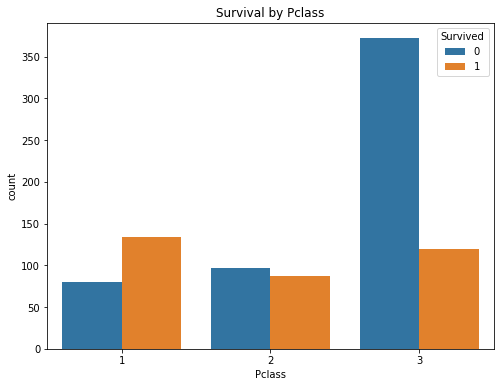

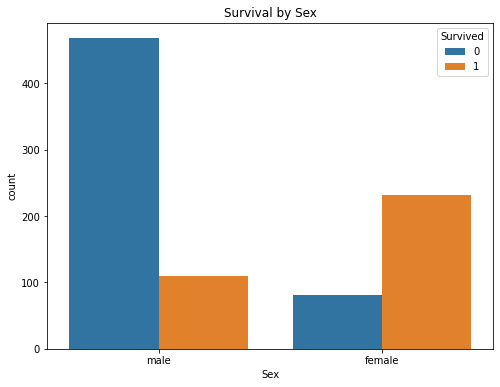

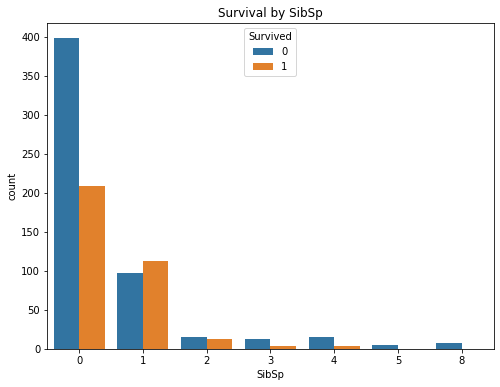

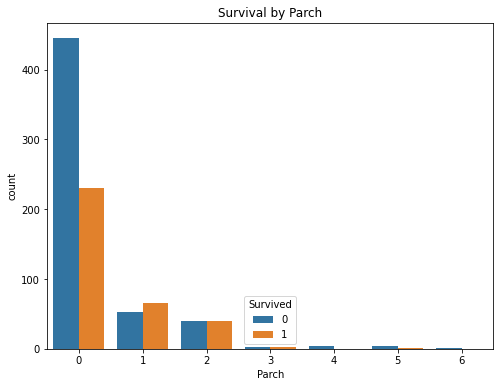

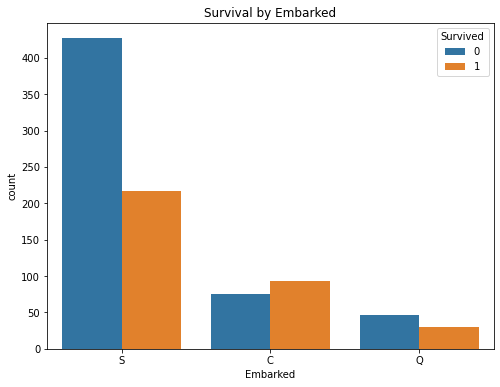

In [ ]:
#plotting how average price varies according to the different categorical and discrete variables
for col in df.drop(columns=['Age', 'Fare', 'Survived']).columns:

  sns.countplot(x=col, hue = 'Survived', data=df)
  plt.title(f'Survival by {col}')
  plt.gcf().set_size_inches(8, 6)
  plt.show()

* Most passengers in first class survived. Most in second and third class didn’t survive, with the highest proportion of not surviving in third class.
* Most female passengers survived while most male passengers did not survive.
* For those with no siblings or spouses aboard, most did not survive. For those with one sibling/spouse aboard, a higher number survived than those who didn’t. For those with 2-8 siblings/spouses aboard - most did not survive.
* For those with no parents or children aboard, most did not survive. For those with one parent/child aboard, a higher number survived than those who didn’t. For those with 2 parents/children aboard, a the proportions of surviving and not surviving were equal. For those with 3-6 parents/children aboard - most did not survive.
* Most passengers who embarked at points S and Q didn’t survive. Most passengers who embarked at point C survived.

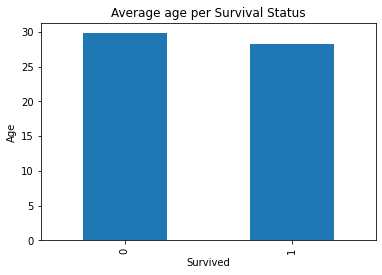

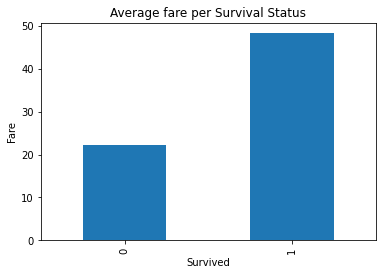

In [ ]:
# continuous 
df.groupby(['Survived'])['Age'].mean().plot.bar()
plt.title('Average age per Survival Status')
plt.ylabel('Age')
plt.show()

df.groupby(['Survived'])['Fare'].mean().plot.bar()
plt.title('Average fare per Survival Status')
plt.ylabel('Fare')
plt.show()

* The average age of those who survived was slightly lower than the average age of those who did not survive.

* The average fare paid of those who survived was higher than the average fare paid of those who did not survive.

In [ ]:
cat[1:]

['Sex', 'Embarked']

In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
#encoding the categorical columns for further analysis
enc = LabelEncoder()
cols = ['Sex', 'Embarked']
for col in cols:
  df[col] = enc.fit_transform(df[col])

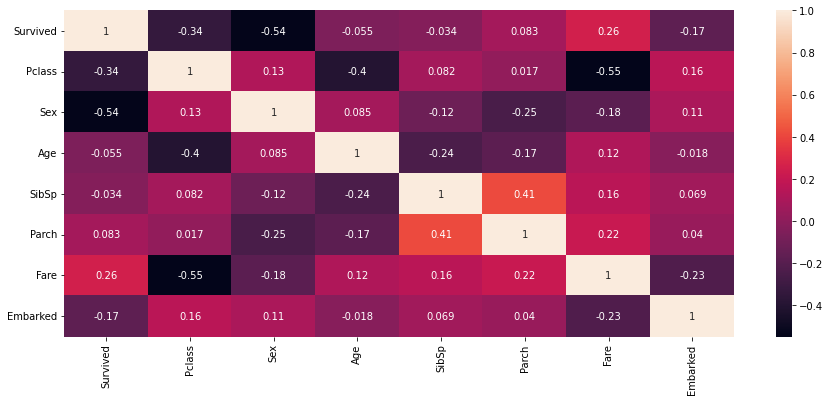

In [ ]:
#correlation heat map
sns.heatmap(df.corr(),annot=True)
plt.gcf().set_size_inches(15,6)
plt.show()

Survived is the target column of interest. According to the absolute correlation values, it has the strongest correlation to sex, followed by Pclass, then fare.

## Modelling (KNN)

Modelling will be done using K-Nearest-Neighbours

### Data Preparation Summary

Cleaning/Preparation summary:
* Unnecessary features - passengerid, name and ticket, were dropped because these were more of unique identifiers for each record.
* Missing values were checked for and found in the age, cabin and embarked columns.
* The cabin column was dropped because > 3/4 of the values were missing
* The missing values in age were dealt with by first getting the average age in each passenger class (showed a pattern of the higher the class the higher the age). A function was created that would check the class of each passenger and if age was missing, would input the respective average age of the class.
* The records with embarked feature as null were dropped (2).
* Outliers and anomalies were checked for. No anomalies were found, and the outliers found were within expected ranges so were kept.
* After univariate and some bivariate analysis, the categorical columns were label encoded

* The features will be scaled before fitting the model.

In [ ]:
accuracies = []

### 80-20 split

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
# separating features and label

# 
X = df.drop('Survived', axis=1)
y = df['Survived']

#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Accuracy score:  0.7134831460674157
[[85 20]
 [31 42]]


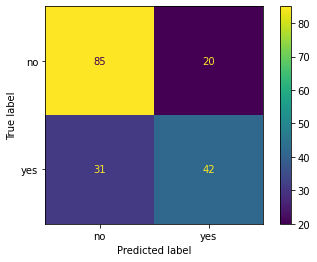

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       105
           1       0.68      0.58      0.62        73

    accuracy                           0.71       178
   macro avg       0.71      0.69      0.70       178
weighted avg       0.71      0.71      0.71       178



In [ ]:
#splitting into test and train (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracies.append(['80-20: Accuracy ', accuracy, 'f1 (+ve class): ', metrics.f1_score(y_test, y_pred)])
print('Accuracy score: ', accuracy)
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['no', 'yes'])
plt.show()
print(metrics.classification_report(y_test, y_pred))

* true positives-42
* false negatives - 31
* true negatives - 85
* false positives - 20

### 70-30 split

Accuracy score:  0.7715355805243446
[[135  22]
 [ 39  71]]


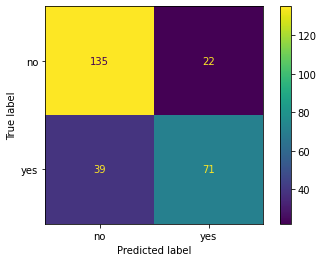

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       157
           1       0.76      0.65      0.70       110

    accuracy                           0.77       267
   macro avg       0.77      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267



In [ ]:
#splitting into test and train (70-30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracies.append(['70-30: Accuracy ', accuracy, 'f1 (+ve class): ', metrics.f1_score(y_test, y_pred)])
print('Accuracy score: ', accuracy)
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['no', 'yes'])
plt.show()
print(metrics.classification_report(y_test, y_pred))

* true positives-71
* false negatives - 39
* true negatives - 135
* false positives - 22

In [ ]:
accuracies

[['80-20: Accuracy ',
  0.7134831460674157,
  'f1 (+ve class): ',
  0.6222222222222222],
 ['70-30: Accuracy ',
  0.7715355805243446,
  'f1 (+ve class): ',
  0.6995073891625616]]

The 70-30 train test split has higher accuracy (77%) than the 80-20 split (71%).

### 60-40 split

Accuracy score:  0.7865168539325843
[[187  29]
 [ 47  93]]


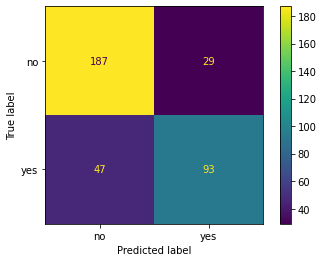

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       216
           1       0.76      0.66      0.71       140

    accuracy                           0.79       356
   macro avg       0.78      0.77      0.77       356
weighted avg       0.78      0.79      0.78       356



In [ ]:
#splitting into test and train (60-40)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracies.append(['60-40: Accuracy ', accuracy, 'f1 (+ve class): ', metrics.f1_score(y_test, y_pred)])
print('Accuracy score: ', accuracy)
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['no', 'yes'])
plt.show()
print(metrics.classification_report(y_test, y_pred))

* true positives-93
* false negatives - 47
* true negatives - 187
* false positives - 29

In [ ]:
accuracies

[['80-20: Accuracy ',
  0.7134831460674157,
  'f1 (+ve class): ',
  0.6222222222222222],
 ['70-30: Accuracy ',
  0.7715355805243446,
  'f1 (+ve class): ',
  0.6995073891625616],
 ['60-40: Accuracy ',
  0.7865168539325843,
  'f1 (+ve class): ',
  0.7099236641221374]]

The 60-40 train-test split gave the best accuracy. The second best accuracy was by the 70-30 split, with the 80-20 split being the least accurate. 

### Optimization

Optimizing best model so far (60-40 train-test split).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

#### Varying the Number of Nearest Neighbours

In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_neighbors': np.arange(3, 15, 2)}

knn = KNeighborsClassifier()
#finding values
search = GridSearchCV(estimator=knn,param_grid=parameters,scoring='accuracy')
search.fit(X_train,y_train)
print(search.best_params_)

{'n_neighbors': 11}


Accuracy score:  0.7921348314606742
[[193  23]
 [ 51  89]]


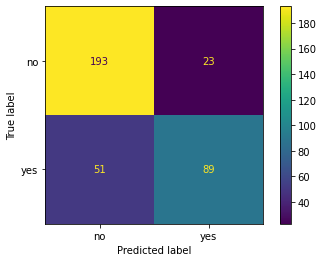

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       216
           1       0.79      0.64      0.71       140

    accuracy                           0.79       356
   macro avg       0.79      0.76      0.77       356
weighted avg       0.79      0.79      0.79       356



In [ ]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracies.append(['(11 neighbours) 60-40: Accuracy ', accuracy, 'f1 (+ve class): ', metrics.f1_score(y_test, y_pred)])
print('Accuracy score: ', accuracy)
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['no', 'yes'])
plt.show()
print(metrics.classification_report(y_test, y_pred))

* true positives-89
* false negatives - 51
* true negatives - 193
* false positives - 23

In [ ]:
accuracies

[['80-20: Accuracy ',
  0.7134831460674157,
  'f1 (+ve class): ',
  0.6222222222222222],
 ['70-30: Accuracy ',
  0.7715355805243446,
  'f1 (+ve class): ',
  0.6995073891625616],
 ['60-40: Accuracy ',
  0.7865168539325843,
  'f1 (+ve class): ',
  0.7099236641221374],
 ['(11 neighbours) 60-40: Accuracy ',
  0.7921348314606742,
  'f1 (+ve class): ',
  0.7063492063492063]]

The model with 11 nearest neighbours had a higher accuracy than 5 nearest neighbours (0.792 vs 0.787). f1 slightly lower (0.7063 vs 0.7099)

#### Distance Metric

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_neighbors': np.arange(3, 15, 2),
              'metric': ['minkowski', 'euclidean','manhattan']}

knn = KNeighborsClassifier()
#finding values
search = GridSearchCV(estimator=knn,param_grid=parameters,scoring='accuracy')
search.fit(X_train,y_train)
print(search.best_params_)


{'metric': 'minkowski', 'n_neighbors': 11}


The best distance metric is the default which was used with n_neighbours as 11 in the model under the section above 'varying number of nearest neighbours', which resulted in an accuracy of 0.7921.

#### Dimensionality Reduction (LDA)

Accuracy score:  0.7921348314606742
[[193  23]
 [ 51  89]]


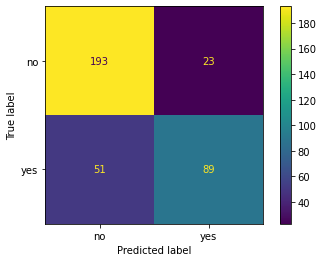

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       216
           1       0.79      0.64      0.71       140

    accuracy                           0.79       356
   macro avg       0.79      0.76      0.77       356
weighted avg       0.79      0.79      0.79       356



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracies.append(['LDA + (11 neighbours) 60-40: Accuracy ', accuracy, 'f1 (+ve class): ', metrics.f1_score(y_test, y_pred)])
print('Accuracy score: ', accuracy)
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['no', 'yes'])
plt.show()
print(metrics.classification_report(y_test, y_pred))

* true positives-89
* false negatives - 51
* true negatives - 193
* false positives - 23

In [ ]:
accuracies

[['80-20: Accuracy ',
  0.7134831460674157,
  'f1 (+ve class): ',
  0.6222222222222222],
 ['70-30: Accuracy ',
  0.7715355805243446,
  'f1 (+ve class): ',
  0.6995073891625616],
 ['60-40: Accuracy ',
  0.7865168539325843,
  'f1 (+ve class): ',
  0.7099236641221374],
 ['(11 neighbours) 60-40: Accuracy ',
  0.7921348314606742,
  'f1 (+ve class): ',
  0.7063492063492063],
 ['LDA + (11 neighbours) 60-40: Accuracy ',
  0.7921348314606742,
  'f1 (+ve class): ',
  0.7063492063492063]]

The accuracy is the same as a similar model without LDA.

#### Feature selection (correlation)

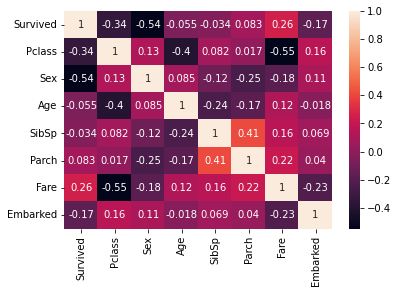

In [ ]:
sns.heatmap(df.corr(), annot=True)

Accuracy score:  0.800561797752809
[[185  31]
 [ 40 100]]


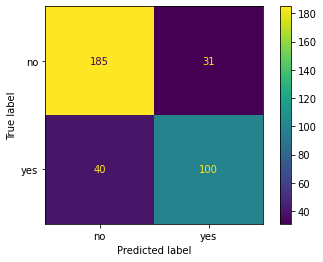

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       216
           1       0.76      0.71      0.74       140

    accuracy                           0.80       356
   macro avg       0.79      0.79      0.79       356
weighted avg       0.80      0.80      0.80       356



In [ ]:
#As can be seen from the correlation heatmap above, fare and pclass
#have a strong correlation (> 0.5). Will test dropping one of the columns

X = df.drop(['Survived', 'Pclass'], axis=1)
y = df['Survived']

#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)


# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracies.append(['Drop Pclass + (11 neighbours) 60-40: Accuracy ', accuracy, 'f1 (+ve class): ', metrics.f1_score(y_test, y_pred)])
print('Accuracy score: ', accuracy)
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['no', 'yes'])
plt.show()
print(metrics.classification_report(y_test, y_pred))

* true positives-100
* false negatives - 40
* true negatives - 185
* false positives - 31

In [ ]:
accuracies

[['80-20: Accuracy ',
  0.7134831460674157,
  'f1 (+ve class): ',
  0.6222222222222222],
 ['70-30: Accuracy ',
  0.7715355805243446,
  'f1 (+ve class): ',
  0.6995073891625616],
 ['60-40: Accuracy ',
  0.7865168539325843,
  'f1 (+ve class): ',
  0.7099236641221374],
 ['(11 neighbours) 60-40: Accuracy ',
  0.7921348314606742,
  'f1 (+ve class): ',
  0.7063492063492063],
 ['LDA + (11 neighbours) 60-40: Accuracy ',
  0.7921348314606742,
  'f1 (+ve class): ',
  0.7063492063492063],
 ['Drop Pclass + (11 neighbours) 60-40: Accuracy ',
  0.800561797752809,
  'f1 (+ve class): ',
  0.7380073800738008]]

Using 11-neighbours as identified by the grid search(the 60-40 split), and dropping Pclass which was highly correlated to Fare resulted in the best  accuracy - 0.80. Other metrics such as f1-scores are also the highest (0.74).

## Conclusions and Recommendations

### Conclusion

The dataset was loaded, and cleaned, and univariate and bivariate analysis carried out providing valuable insights on the target and feature variables. Multivariate analysis and modelling were then carried out. The major objective was achieved - building a model that is able to determine whether or not a passenger survived the titanic.



**Some univariate analysis results:**
* A higher number of passengers didn’t survive compared to the number of those who did.
* Most passengers were in third class.
* Most passengers were male.
* Most passengers had no siblings or spouses aboard.
* Most passengers had no parents or children aboard.
* Most passengers embarked at point ‘S’ 
* Most passengers were aged between 24 and 32 etc

**Some bivariate analysis results**:

* Most passengers in first class survived. Most in second and third class didn’t survive, with the highest proportion of not surviving in third class.
* Most female passengers survived while most male passengers did not survive.
* Most passengers who embarked at points S and Q didn’t survive. Most passengers who embarked at point C survived.
* The average age of those who survived was slightly lower than the average age of those who did not survive.
* The average fare paid of those who survived was higher than the average fare paid of those who did not survive.


**Modelling**

KNN ( K-Nearest-Neighbours) was applied.

Initially, 5 neighbours were used in modelling, with different ratios of train size:test size:

* 80-20: , 0.713 accuracy, 0.622 f1
* 70-30: , 0.771 accuracy, 0.70 f1
* 60-40: , 0.787 accuracy, 0.71 f1

As can be seen above, train-test split of 60:40 gave the model with the best accuracy.

Using the train:test ratio of 60:40, various optimization techniques were tested to see if a model with accuracy > the 0.787 could be identified:
* First, a grid search was used to identify the best number of neighbours. This number was 11, and using this value gave an accuracy of 0.792 (f1-0.71), which is greater than the 0.787 accuracy using 5 n_neighbours.
* Next, a grid search was used to identify if there was a better distance metric, but the result gave the default (minkowski) which we used above so it would result in the same accuracy.
* Thirdly, a dimensionality reduction technique - LDA- was used, with 11 neighbours as identified by the grid search. The accuracy was the same as the above - 0.792 (f1-0.71)
* Finally, feature selection using pearsons correlation was done. Pclass and Fare had a correlation of -0.55, which is strong. Pclass was dropped, and knn algorithm ran with 11 neighbours. **The resulting model had an accuracy of 0.80, which is the best accuracy identified. The f1-score (0.74- positive class) was also the best out of all the models.**

### Recommendation

Based on the analysis, for determining whether or not a passenger survived the titanic, we would recommend using a 60-40 train-test split, then with 11 nearest neighbours, using these features: 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'.

Out of all the models tested, it was the one with the best predictive power (highest accuracy, f1).

To optimize the model even further, we recommend exploring implementing weighted voting, k-fold cross validation.